In [63]:
!make
!echo 'type,N,clocks' > measures.csv
!cat measures.csv

gcc main.c -std=c11 -O0 -o a.out
type,N,clocks


In [64]:
%%writefile tas.sh

echo -en "\rtas $1..."
for i in $(seq 7)
{
    echo "tas,$1,$(./a.out $1)" >> measures.csv
}

Overwriting tas.sh


In [65]:
%%writefile ticket.sh

echo -en "\rticket $1..."
for i in $(seq 7)
{
    echo "ticket,$1,$(./a.out $1 ticket)" >> measures.csv
}

Overwriting ticket.sh


In [66]:
!chmod +x tas.sh
!chmod +x ticket.sh

In [67]:
!./tas.sh 1
!./tas.sh 2
!./tas.sh 3
!./tas.sh 4
!./tas.sh 5
!./tas.sh 6
!./tas.sh 8
!./tas.sh 10
!./tas.sh 12
!./tas.sh 14
!./tas.sh 16
!./tas.sh 18
!./tas.sh 20
!./tas.sh 22
!./tas.sh 24
!./tas.sh 26
!./tas.sh 30
!./tas.sh 34
!./tas.sh 40
!./tas.sh 45
!./tas.sh 50
!./tas.sh 55
!./tas.sh 60

tas 60...

In [68]:
!./ticket.sh 1
!./ticket.sh 2
!./ticket.sh 3
!./ticket.sh 4
!./ticket.sh 5
!./ticket.sh 6
!./ticket.sh 8
!./ticket.sh 10
!./ticket.sh 12
!./ticket.sh 14
!./ticket.sh 16
!./ticket.sh 18
!./ticket.sh 20
!./ticket.sh 22
!./ticket.sh 24
!./ticket.sh 26
!./ticket.sh 30
!./ticket.sh 34
!./ticket.sh 40
!./ticket.sh 45
!./ticket.sh 50
!./ticket.sh 55
!./ticket.sh 60

ticket 60...

# Рисуем графики

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('measures.csv')
df.sample(7)

,type,N,clocks
85,tas,20,11725806
10,tas,2,2073121
151,tas,55,30485547
96,tas,22,11969900
164,ticket,1,1634596
54,tas,10,7108021
122,tas,34,19722052


In [71]:
df = df.groupby(['type', 'N'])['clocks'].mean().reset_index()
df.sample(7)

,type,N,clocks
8,tas,12,7.487178e+06
32,ticket,14,8.636365e+06
22,tas,60,3.246466e+07
10,tas,16,9.218083e+06
2,tas,3,2.371153e+06
15,tas,26,1.530687e+07
33,ticket,16,9.877775e+06


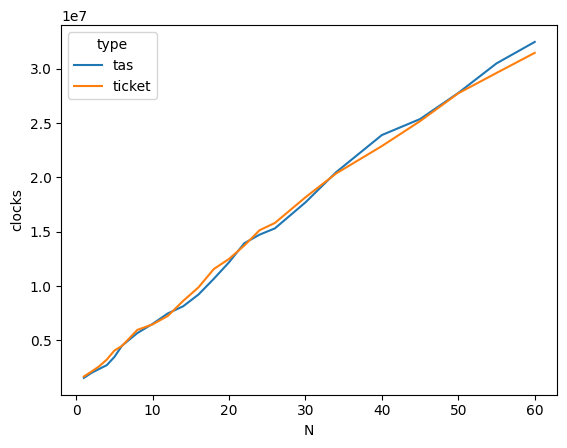

In [74]:
sns.lineplot(data=df, x='N', y='clocks', hue='type');